### Importing necessary datasets

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = keras.datasets.fashion_mnist

In [4]:
(train_images,train_labels), (test_image,test_labels) = data.load_data()

### To figure out the number of labels

In [5]:
print(train_labels[6])

7


### To find out the shape of the training and test datasets

In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
test_image.shape

(10000, 28, 28)

In [8]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Displaying the images

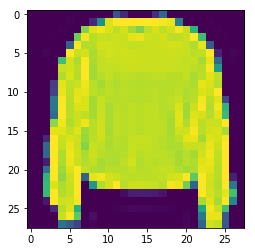

In [9]:
plt.imshow(train_images[7],cmap= plt.cm.binary)
plt.imshow(train_images[7])

### Reducing pixel size

In [10]:
train_images = train_images/255.0
test_images = test_image/255.0

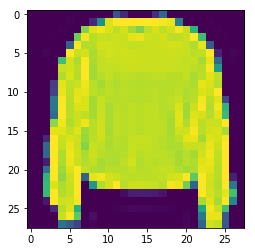

In [11]:
plt.imshow(train_images[7],cmap= plt.cm.binary)
plt.imshow(train_images[7])

In [ ]:
## it looks almost the same but values in the bands inside differ i.e. RGB

### Fitting to the model

In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),     #Shrinking the data
    keras.layers.Dense(128,activation="relu"),     # fully conncted layer
    keras.layers.Dense(10,activation="softmax")
])

Instructions for updating:
Colocations handled automatically by placer.


In [13]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [16]:
model.fit(train_images,train_labels,epochs=100)

Epoch 1/100
60000/60000 [==============================] - 5s 90us/sample - loss: 0.0936 - acc: 0.9644
Epoch 2/100
60000/60000 [==============================] - 5s 91us/sample - loss: 0.0905 - acc: 0.9654
Epoch 3/100
60000/60000 [==============================] - 5s 87us/sample - loss: 0.0900 - acc: 0.9660
Epoch 4/100
60000/60000 [==============================] - 5s 90us/sample - loss: 0.0873 - acc: 0.9671
Epoch 5/100
60000/60000 [==============================] - 5s 91us/sample - loss: 0.0874 - acc: 0.9667
Epoch 6/100
60000/60000 [==============================] - 5s 88us/sample - loss: 0.0882 - acc: 0.9666
Epoch 7/100
60000/60000 [==============================] - 5s 89us/sample - loss: 0.0838 - acc: 0.9678
Epoch 8/100
60000/60000 [==============================] - 5s 91us/sample - loss: 0.0841 - acc: 0.9685
Epoch 9/100
60000/60000 [==============================] - 5s 87us/sample - loss: 0.0817 - acc: 0.9693
Epoch 10/100
60000/60000 [==============================] - 5s 89us/sampl

In [17]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('\nTest accuracy:', test_acc)

10000/10000 [==============================] - 0s 36us/sample - loss: 0.7978 - acc: 0.8889

Test accuracy: 0.8889


### Here are the various iterations using different Epochs
#### Epoch 10 acc 68
#### Epoch 50 acc 88.7
#### Epoch 100 acc 88.8

### To predict the item and display corresponding name

In [27]:
prediction = model.predict(test_images)
print(class_names[np.argmax(prediction[7])])

Ankle boot


### To show the images we are predicting on 

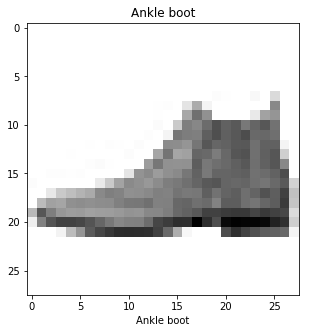

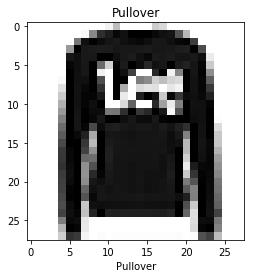

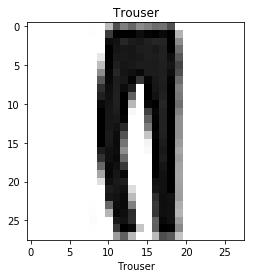

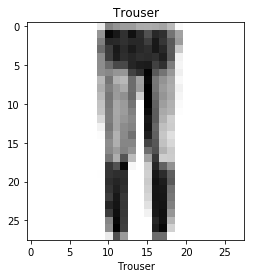

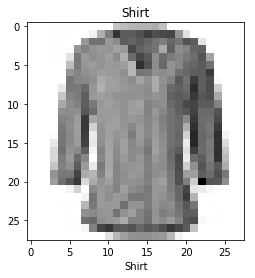

In [28]:
plt.figure(figsize=(5,5))
for i in range(5):
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[test_labels[i]])
    plt.title(class_names[np.argmax(prediction[i])])
    plt.show()